In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from os import listdir
from os.path import isfile, join
import tensorflow as tf
import cv2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Model
from tensorflow.keras.layers import Input,Activation,Add, MaxPooling2D, Flatten, Dense
import gc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Copy zip file into google collab, unzip, and delete zip file
zip_path = 'drive/MyDrive/Project2/Data/CroppedImages.zip'
!cp 'drive/MyDrive/Project2/Data/CroppedImages.zip' "/content/data/cropped/"
!unzip -q '/content/data/cropped/CroppedImages.zip' -d "/content/data/cropped/"
!rm '/content/data/cropped/CroppedImages.zip'

In [ ]:
#Import image labels and paths to dataframe
mypath = "/content/data/cropped/"
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [mypath + x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
filedf = pd.DataFrame(data = splitcolumns, columns = filecolumns)

In [ ]:
filedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     23705 non-null  object
 1   gender  23705 non-null  object
 2   race    23705 non-null  object
 3   file    23705 non-null  object
dtypes: object(4)
memory usage: 740.9+ KB


In [ ]:
filedf.describe()

,age,gender,race,file
count,23705,23705,23705,23705
unique,104,2,5,23705
top,26,0,0,/content/data/cropped/48_0_0_20170113183802559...
freq,2197,12391,10078,1


In [ ]:
filedf.head()

,age,gender,race,file
0,48,0,0,/content/data/cropped/48_0_0_20170113183802559...
1,55,0,0,/content/data/cropped/55_0_0_20170117190804738...
2,31,1,2,/content/data/cropped/31_1_2_20170109003538257...
3,56,1,0,/content/data/cropped/56_1_0_20170110141043329...
4,35,0,0,/content/data/cropped/35_0_0_20170117134825736...


In [ ]:
images = []
labels = []

In [ ]:
!unzip -q cats_dogs.zip
!rm cats_dogs.zip

In [ ]:
for index, row in filedf.iterrows():
    img = np.array(cv2.imread(row[3]))
    images.append(img)
    labels.append([row[0],row[1],row[2]])

In [ ]:
npimages = np.array(images)
nplabels = np.array(labels).astype(int)

In [ ]:
X = npimages
y = nplabels

In [ ]:
ymodel = np.array([[x[0],x[1],x[2]] for x in y])
ymodel.shape

(23705, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, ymodel, test_size=0.33, random_state=42)

In [ ]:
y_train2=[y_train[:,0],y_train[:,1],y_train[:,2]]
y_test2=[y_test[:,0],y_test[:,1],y_test[:,2]]

In [ ]:
if 'images' in globals():
    del images
if 'labels' in globals():
    del labels
if 'npimages' in globals():
    del npimages
if 'nplabels' in globals():
    del nplabels
if 'X' in globals():
    del X
if 'y' in globals():
    del y

gc.collect()

88

In [ ]:
print(np.unique(y_train2[0]))
print(np.unique(y_train2[1]))
print(np.unique(y_train2[2]))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  95  96  99 100 101 105 110 111 115 116]
[0 1]
[0 1 2 3 4]


In [ ]:
#Simplifies adding a layer
def Convolution(input_tensor,filters):

    x = layers.Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same', activation = 'relu')(input_tensor)

    return x

#Simple CNN model
#Conv stands for neural network layers of (x,y). x standing for the input layers and y standing for how many filter layers there are
#maxp is a pooling layer that reduces the number of nodes of the next layer
#flatten changes the previous layer to a 1 dimensional layer
#dense layers have each node connected to every node in the previous layer. In this case, we have 3 dense layers of differing weights representing
#age, gender, and race. While all previous layers have collected features, dense layers calculate based on these collected features.
#They then send their calculations to the final dense layer to determine classification
#Binary Crossentropy = Classifies based on a binary value
#Sparse Categorical Crossentropy = Classifies based on an integer value with more than 2 possible values
def Simplemodel(input_shape):

  inputs = Input((input_shape))

  conv_1= Convolution(inputs,32)

  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)

  conv_2 = Convolution(maxp_1,64)

  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)

  conv_3 = Convolution(maxp_2,64)

  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)

  conv_4 = Convolution(maxp_3,64)

  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)

  conv_5 = Convolution(maxp_4,64)

  flatten= Flatten() (conv_5)

  dense_1= Dense(64,activation='relu')(flatten)

  dense_2= Dense(64,activation='relu')(flatten)

  dense_3= Dense(64,activation='relu')(flatten)

  output_1= Dense(1,activation="relu",name='age_out')(dense_1)

  output_2= Dense(1,activation="sigmoid",name='sex_out')(dense_2)
    
  output_3= Dense(5,activation="sigmoid",name='race_out')(dense_3)

  model = Model(inputs=[inputs], outputs=[output_1,output_2,output_3])

  model.compile(loss=["mean_squared_error","binary_crossentropy", "sparse_categorical_crossentropy"], optimizer="Adam",

  metrics=["accuracy"])

  return model

In [ ]:
#Creating the model
Modelsimple=Simplemodel((200,200,3))
Modelsimple.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 200, 200, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 100, 100, 32  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
#Training the model
SimpleHistory=Modelsimple.fit(X_train,y_train2,validation_data=(X_test,y_test2),epochs=10)

Epoch 1/10
497/497 [==============================] - 1186s 2s/step - loss: 303.5403 - age_out_loss: 300.8608 - sex_out_loss: 0.8067 - race_out_loss: 1.8727 - age_out_accuracy: 0.0459 - sex_out_accuracy: 0.7136 - race_out_accuracy: 0.4600 - val_loss: 218.0721 - val_age_out_loss: 215.6346 - val_sex_out_loss: 0.4991 - val_race_out_loss: 1.9385 - val_age_out_accuracy: 0.0428 - val_sex_out_accuracy: 0.7689 - val_race_out_accuracy: 0.4690
Epoch 2/10
497/497 [==============================] - 1191s 2s/step - loss: 171.1198 - age_out_loss: 169.5614 - sex_out_loss: 0.4248 - race_out_loss: 1.1337 - age_out_accuracy: 0.0362 - sex_out_accuracy: 0.8144 - race_out_accuracy: 0.5832 - val_loss: 147.5967 - val_age_out_loss: 146.1185 - val_sex_out_loss: 0.4197 - val_race_out_loss: 1.0584 - val_age_out_accuracy: 0.0268 - val_sex_out_accuracy: 0.8153 - val_race_out_accuracy: 0.5977
Epoch 3/10
497/497 [==============================] - 1174s 2s/step - loss: 138.4957 - age_out_loss: 137.0971 - sex_out_loss

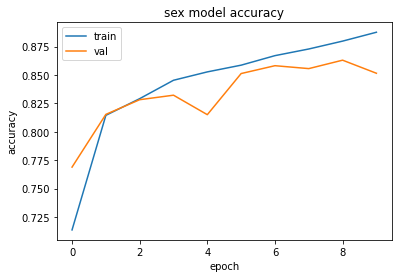

In [ ]:
#Sex accuracy metric
plt.plot(SimpleHistory.history['sex_out_accuracy'])
plt.plot(SimpleHistory.history['val_sex_out_accuracy'])
plt.title('sex model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

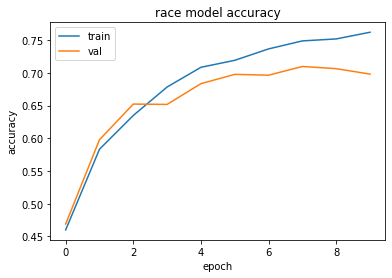

In [ ]:
#Race accuracy metric
plt.plot(SimpleHistory.history['race_out_accuracy'])
plt.plot(SimpleHistory.history['val_race_out_accuracy'])
plt.title('race model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

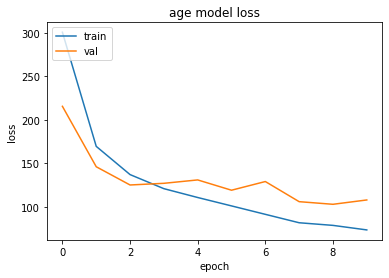

In [ ]:
#Age accuracy metric
plt.plot(SimpleHistory.history['age_out_loss'])
plt.plot(SimpleHistory.history['val_age_out_loss'])
plt.title('age model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Confusion Matrices
ypred = Modelsimple.predict(X_test)

In [ ]:
y_gender_classes = np.round(ypred[1])
y_race_classes = np.argmax(ypred[2],axis=-1)
y_age_values = np.round(ypred[0])

In [ ]:
print('gender confusion matrix')
print(confusion_matrix(y_test2[1],y_gender_classes))

gender confusion matrix
[[3678  416]
 [ 746 2983]]


In [ ]:
print('race confusion matrix')
print(confusion_matrix(y_test2[2],y_race_classes))

race confusion matrix
[[2633  267  148  223   33]
 [ 116 1261   33   51   16]
 [ 200   93  770   54   11]
 [ 264  228   69  733   30]
 [ 244  122   57  104   63]]


In [ ]:
np.concatenate([y_test2[0],np.abs(ypred[0].flatten() - y_test2[0] )])

array([27.        ,  4.        , 31.        , ...,  2.61830902,
        1.45278168,  2.8862114 ])

In [ ]:
[y_test2[0],np.abs(ypred[0].flatten() - y_test2[0] )]

[array([27,  4, 31, ..., 37, 45, 50]),
 array([12.11774826,  1.98625994,  4.63582039, ...,  2.61830902,
         1.45278168,  2.8862114 ])]